<a href="https://colab.research.google.com/github/Jisan10667/SWE-3-2-Mechine-Learning-Assignment/blob/main/2.%20Logistic%20Regression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Logistic Regression Intuition**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output
import pprint as pp

In [ ]:

X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.txt to data.txt


In [ ]:
data = pd.read_csv('./data.txt', header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Scaling is required or not

In [ ]:
def mean_scaling(ara):
  return (ara-ara.min())/(ara.max()-ara.min())

In [ ]:
x1_scaled = mean_scaling(data["x1"].to_numpy())
x2_scaled = mean_scaling(data["x2"].to_numpy())

In [ ]:
data["x1"].min(),data["x1"].max(),data["x2"].min(),data["x2"].max(), data["x1"].mean()
# data["x1"]

(30.05882244669796,
 99.82785779692128,
 30.60326323428011,
 98.86943574220612,
 65.64427405732314)

In [ ]:
test = np.column_stack((np.zeros(4),np.ones(4)))
test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Dataframe to np.array

In [ ]:
# Dataframe to np.array
X_train = data[["x1","x2"]].to_numpy()
y_train = data['y'].to_numpy()

# Create a two-dimensional array with two one-dimensional arrays
X_train_scaled = np.column_stack((x1_scaled,x2_scaled))
X_train_scaled[:5], X_train[:5]

(array([[0.06542784, 0.69465488],
        [0.00326632, 0.19470455],
        [0.08296784, 0.61961779],
        [0.43176427, 0.81600135],
        [0.7019434 , 0.65539214]]), array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644]]))

(100,) (100,)


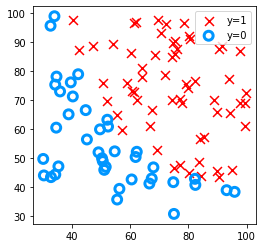

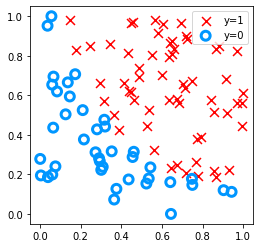

In [ ]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))
fig, ax1 = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
print(pos.shape, neg.shape)

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )


ax1.scatter(X_train_scaled[pos, 0], X_train_scaled[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax1.scatter(X_train_scaled[neg, 0], X_train_scaled[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax1.legend(loc='best' )


In [ ]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [ ]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [ ]:
def compute_cost_logistic_matrix(X, y, w, b):
  m = X.shape[0]
  predicted_m = np.dot(X, w)+ b
  sigmoid_m = sigmoid(predicted_m)
  cost_m = - y * np.log(sigmoid_m) - (1-y) * np.log(1-sigmoid_m)
  cost = np.sum(cost_m)/m
  return cost;

In [ ]:

w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train_scaled, y_train, w_tmp, b_tmp))
print(compute_cost_logistic_matrix(X_train_scaled, y_train, w_tmp, b_tmp))


1.17359332246621
1.1735933224662103


In [ ]:
x1 = np.arange(9.0).reshape((3, 3))

x2 = np.arange(1,10).reshape((3,3))
print(x1,x2)
pp.pprint(x1 * x2)
pp.pprint(np.arange(400))

[0 1 2 3 4 5] [ 3  2  1  0 -1 -2] [ 4  3  2  1  0 -1]


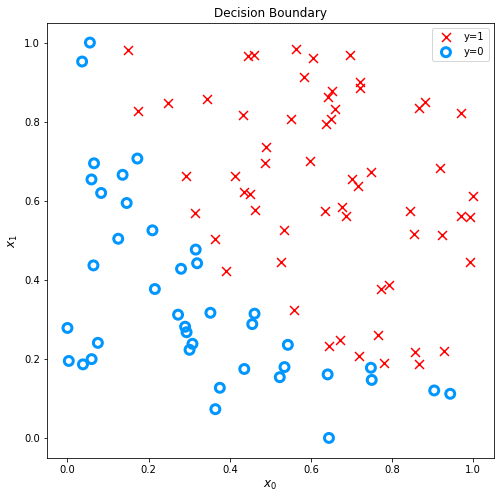

In [ ]:

x0 = np.arange(0,6)

x1 = 3 - x0
x1_other = 4 - x0
print(x0,x1,x1_other)
fig,ax = plt.subplots(1, 1, figsize=(8,8))


ax.scatter(X_train_scaled[pos, 0], X_train_scaled[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train_scaled[neg, 0], X_train_scaled[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [ ]:
w_array1 = np.array([1,1])
b_1 = -1
w_array2 = np.array([1,1])
b_2 = -2

print("Cost for b = -1 : ", compute_cost_logistic(X_train_scaled, y_train, w_array1, b_1))
print("Cost for b = -2 : ", compute_cost_logistic(X_train_scaled, y_train, w_array2, b_2))

Cost for b = -1 :  0.5621803064461521
Cost for b = -2 :  0.7713312852744155


### **Gradient Descent**

In [ ]:
def compute_gradient_logistic(X, y, w, b):

    m,n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

In [ ]:
def compute_gradient_logistic_using_matrix(X, y, w, b):

  m = X.shape[0]
  a = sigmoid(np.dot(X,w)+b)
  dj_dw = (1/m) * np.dot(X.T, (a-y))
  dj_db = (1/m) * np.sum(a-y)
  return dj_db, dj_dw

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, use_matrix = False):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        if(not use_matrix):
          # Calculate the gradient and update the parameters
          dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        else:
          # Calculate the gradient(using matrix) and update the parameters
          dj_db, dj_dw = compute_gradient_logistic_using_matrix(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing

In [ ]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000


w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)


w_out, b_out, _ = gradient_descent(X_train_scaled, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")



w_out_matrix, b_out_matrix, _ = gradient_descent(X_train_scaled, y_train, w_tmp, b_tmp, alph, iters, True)
print(f"\nupdated parameters: w:{w_out_matrix}, b:{b_out_matrix}")

Iteration    0: Cost 0.6891063308247324   
Iteration 1000: Cost 0.37121531228885346   
Iteration 2000: Cost 0.30362706169470133   
Iteration 3000: Cost 0.27349804277227746   
Iteration 4000: Cost 0.2563041438151084   
Iteration 5000: Cost 0.2451557225637806   
Iteration 6000: Cost 0.237345692087588   
Iteration 7000: Cost 0.23158389570294344   
Iteration 8000: Cost 0.2271731157852497   
Iteration 9000: Cost 0.22370172405872352   

updated parameters: w:[9.34700661 8.76650439], b:-8.185799512531101


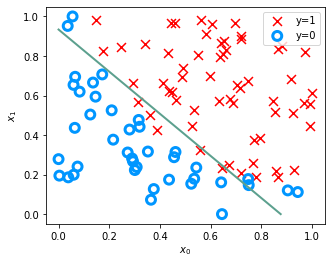

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
# ax.axis([0, 4, 0, 3.5])

# Plot examples
ax.scatter(X_train_scaled[pos, 0], X_train_scaled[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train_scaled[neg, 0], X_train_scaled[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='#5ca08e', lw=2)
plt.show()